![CDS 411 logo](../../img/cds-411-logo.png)

# Class 9: System dynamics models: Drug dosage I

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Background

### Pharmacokinetics

*   Quantitative field of science
*   Question: "what is a correct/effective dosage for a drug?"
*   Influenced by multiple factors: drug absorption, distribution, metabolism, and elimination

### Drug concentration

*   Amount of drug in the system
    \begin{equation}
    \dfrac{\text{amount of drug}}{\text{volume of blood}}
    \end{equation}

**<p style="font-size: 1.5em; text-align: center;">Why would we use drug <emph>concentration</emph> rather than the absolute amount?</p>**

### Minimum Effective Concentration (MEC)

*   The least amount of drug that is helpful

### Maximum Therapeutic Concentration (MTC)

*   Alternatively referred to as "Minimum Toxic Concentration"
*   Largest amount that is helpful without having dangerous or intolerable side effects

### Therapeutic range

*   Drug concentration between the MEC and the MTC thresholds

### Drug half-life

*   Amount of time it takes for half the drug to be eliminated from the body.
    \begin{equation}
    r=\dfrac{\ln(2)}{t_{1/2}}
    \end{equation}

### Blood, plasma, and blood serum

*   It's common for drug concentration and the drug half-life to be measured with respect to concentration in the plasma or the blood serum.
*   Plasma is the fluid that contains blood cells.
*   Blood serum is the clear fluid that separates from blood when it clots.

### Adult body

*   Contains approximately 5 liters of blood.
*   Contains approximately 3 liters of plasma.
*   Contains approximately 3 liters of blood serum.

## One-compartment model of single dose

### One-compartment model

*   A simplified representation of how a body processes a drug.
*   Model the body as a single homogeneous compartment
*   Distribution is instantaneous
*   Concentration is proportional to drug dosage and the volume of blood in a patient
*   Rate of elimination is proportional to the amount of drug in the system

### Basic facts about aspirin (acetylsalicylic acid)

*   Dosage: Two 325 milligram tablets every 4 hours, up to 12 tablets per day
*   Pain relief occurs at concentrations starting at 150 to 300 micrograms per milliliter of **plasma**
*   Toxicity may occur at concentrations of 350 micrograms per milliliter
*   Plasma half-life of a dose between 300 mg and 650 mg is 3.1 hours (smaller dose) to 3.2 hours (larger dose)

### Building an aspirin model

\begin{equation}
\dfrac{dQ}{dt}=-rQ
\end{equation}

*   Assume an adult is taking two 325 milligram tablets
*   Assume a one-compartment model where aspirin is immediately absorbed into the plasma
*   Use upper-bound of aspirin half-life, 3.2 hours
*   MEC of 150 micrograms per milliliter
*   MTC of 350 micrograms per milliliter

**<span style="font-size: 1.5em; text-align: center;">What value should I use for the plasma volume?</span>**

**<span style="font-size: 1.5em; text-align: center;">Do I need to do any unit conversions? If so, what should be converted and what are the new values?</span>**

### System dynamics diagram

<center><img width="50%" src="../../img/aspirin_system_dynamics_model.png"></center>

### Model constants

In [2]:
sim_time = 8  # hours
delta_t = 0.01  # hours
sim_steps = int(sim_time / delta_t)
half_life = 3.2  # hours
plasma_volume = 3000  # milliliters
initial_aspirin_in_plasma = 2 * 325 * 1000  # micrograms
elimination_constant = -np.log(2) / half_life  # inverse hours
mec = 150  # micrograms
mtc = 350  # micrograms

### Simulation trace

In [3]:
plasma_concentration = [[0, initial_aspirin_in_plasma / plasma_volume]]

### Finite difference equation

Standard `for` loop for unconstrained decay

In [4]:
aspirin_in_plasma = initial_aspirin_in_plasma
for step_index in range(1, sim_steps + 1):
    elimination = elimination_constant * aspirin_in_plasma
    aspirin_in_plasma += elimination * delta_t
    plasma_concentration.append([step_index, aspirin_in_plasma / plasma_volume])

Don't forget to convert your results to a data frame!

**How do I extract the "step" column and the "plasma" column from `plasma_concentration`?**

```python
simulation_df = pd.DataFrame({
    "step": ???,
    "plasma": ???,
})
```

List comprehensions!

In [5]:
simulation_df = pd.DataFrame({
    "step": [x[0] for x in plasma_concentration],
    "plasma": [x[1] for x in plasma_concentration],
})
simulation_df["time"] = simulation_df["step"] * delta_t

### Visualization

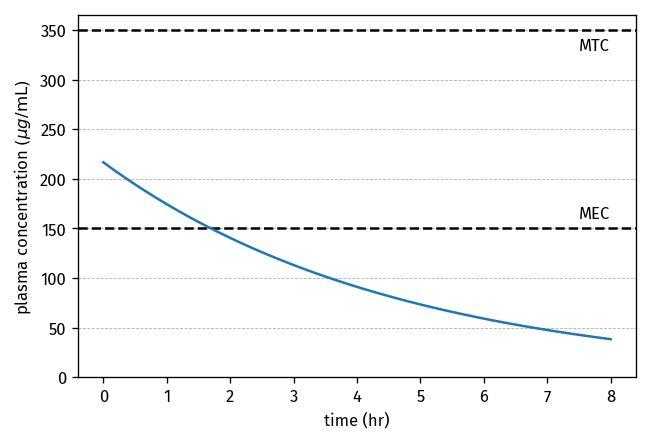

In [6]:
fig, ax = plt.subplots(dpi=120)  # Use dpi to change figure size in notebooks
ax.axhline(mec, color="k", linestyle="--")  # Plots MEC minimum line
ax.axhline(mtc, color="k", linestyle="--")  # Plots MTC maximum line
ax.plot(simulation_df["time"], simulation_df["plasma"].values, "-")
ax.text(7.5, mec + 10, "MEC")
ax.text(7.5, mtc - 20, "MTC")
ax.set_ylim(bottom=0)
ax.set_xlabel("time (hr)")
ax.set_ylabel(r"plasma concentration $(\mu{}g/\mathrm{mL})$");

### In-class practice

Work on Exercise 7 in your textbook:

> How should the one-dose aspirin example be adjusted to incorporate the weight of a male patient? About 65% to 70% of a male's body is liquid. Assume that 1 kilogram of body liquid has a volume of 1 Liter. Assume the patient has a mass of 90 kilograms (comparable to about 198 pounds).

You can discuss with the students near you.

### Body fluid components: percentage breakdown

This diagram comes from the "Extracellular fluid" article on *Wikipedia*, https://en.wikipedia.org/wiki/Extracellular_fluid. From this, we learn that about 7% of our body fluid consists of blood plasma.

![](../../img/wikipedia_cellular_fluid_content.jpg)

### Modified constants

The modifications based on our gathered information are contained in the constants `body_mass`, `body_fluid_volume`, and `plasma_volume`.

In [7]:
sim_time = 8  # hours
delta_t = 0.01  # hours
sim_steps = int(sim_time / delta_t)
half_life = 3.2  # hours
body_mass = 90  # kilograms
body_fluid_volume = 0.70 * body_mass * 1000  # milliliters
plasma_volume = 0.07 * body_fluid_volume  # milliliters
initial_aspirin_in_plasma = 2 * 325 * 1000  # micrograms
elimination_constant = -np.log(2) / half_life  # inverse hours
mec = 150  # micrograms
mtc = 350  # micrograms
plasma_concentration = [[0, initial_aspirin_in_plasma / plasma_volume]]

### Simulation algorithm

This remains the same as last time.

In [8]:
aspirin_in_plasma = initial_aspirin_in_plasma
for step_index in range(1, sim_steps + 1):
    elimination = elimination_constant * aspirin_in_plasma
    aspirin_in_plasma += elimination * delta_t
    plasma_concentration.append([step_index, aspirin_in_plasma / plasma_volume])

In [9]:
simulation_df = pd.DataFrame({
    "step": [x[0] for x in plasma_concentration],
    "plasma": [x[1] for x in plasma_concentration],
})
simulation_df["time"] = simulation_df["step"] * delta_t

### Modified visualization 

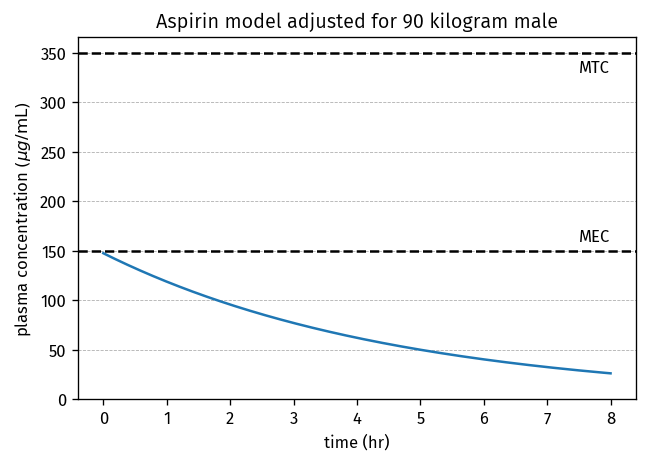

In [10]:
fig, ax = plt.subplots(dpi=120)  # Use dpi to change figure size in notebooks
ax.axhline(mec, color="k", linestyle="--")  # Plots MEC minimum line
ax.axhline(mtc, color="k", linestyle="--")  # Plots MTC maximum line
ax.plot(simulation_df["time"], simulation_df["plasma"].values, "-")
ax.text(7.5, mec + 10, "MEC")
ax.text(7.5, mtc - 20, "MTC")
ax.set_title("Aspirin model adjusted for 90 kilogram male")
ax.set_ylim(bottom=0)
ax.set_xlabel("time (hr)")
ax.set_ylabel(r"plasma concentration $(\mu{}g/\mathrm{mL})$");